In [1]:
######################
#Problem B2.a, HW1
######################
import numpy as np
from mnist import MNIST
import tqdm
import matplotlib.pyplot as plt


def load_dataset():
    mndata = MNIST('./data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test

def one_hot_encoder(labels_train):
    """
    Performs one-hot encoding of the labels

    Parameters
    ----------
    labels_train : np.array of shape (n,)
        Labels
    
    Returns
    -------
    np.array of shape (n,k)
        One-hot-encoded labels
    """
    return np.eye(len(set(labels_train)))[labels_train]

def accuracy_error(y_true, y_pred):
    """
    Trains ridge regression using closed-form solution

    Parameters
    ----------
    y_true : np.array of shape (m,)
        Vector of true labels
    y_pred : np.array of shape (m,)
        Vector of predicted labels
    
    Returns
    -------
    float
        error: 1-accuracy
    """
    return 1-np.mean(y_true == y_pred)

def train(X, Y, reg_lambda):
    """
    Trains ridge regression using closed-form solution

    Parameters
    ----------
    X : np.array of shape (n,d)
        Feature matrix
    Y : np.array of shape (n.k)
        One-hot encoded label matrix
    reg_lambda  : float
        Regularization hyper-parameter, >0

    Returns
    -------
    W_hat : np.array of shape (d,k)
        Weight matrix of ridge regression     
    """
    W_hat = np.linalg.solve(X.T.dot(X) + reg_lambda*np.eye(X.shape[1]), X.T.dot(Y))
    return W_hat 

def predict(W, X_prime):
    """
    Return ridge regression predictions

    Parameters
    ----------
    X : np.array of shape (m,d)
        Feature matrix
    W : np.array of shape (d,k)
        Weight matrix of ridge regression
    reg_lambda  : float
        Regularization hyper-parameter, >0

    Returns
    -------
    predictions : np.array of shape (m,)
        Ridge regression predictions    
    """
    predictions = np.argmax(W.T.dot(X_prime.T), axis = 0)
    return predictions

def non_linear_transform(X, p, G=None, b=None):
    """
    Performs a non-linear transformation of the data: h(x) = cos(Gx+b)

    Parameters
    ----------
    X : np.array of shape (m,d)
        Feature matrix
    p : float
        Dimensionality parameter
    G : np.array of shape (p, d)
        Matrix for the affine projection of features
    b : np.array of shape (p,)
        Vector for the affine projection of features

    Returns
    -------
    np.array of shape (n,p)
        Transformed data
    G : np.array of shape (p, d)
        Matrix for the affine projection of features
    b : np.array of shape (p,)
        Vector for the affine projection of features
    
    """
    d = X.shape[1]
    if G is None:
        G = np.random.normal(0, 0.01, (p,d))
    if b is None:
        b = np.random.uniform(0, 2*np.pi, (p,))
    return np.cos(X.dot(G.T) + b), G, b

if __name__ == "__main__":
    X_train, labels_train, X_test, labels_test = load_dataset()
    Y_train = one_hot_encoder(labels_train)
    #create random permutation
    idx = np.random.permutation(X_train.shape[0])
    train_split = int(X_train.shape[0]*0.8)
    TRAIN = idx[:train_split]
    VAL = idx[train_split:]

    #create training set
    X_train80 = X_train[TRAIN, :]
    Y_train80 = Y_train[TRAIN] #one-hot encoded train labels
    labels_train80 = labels_train[TRAIN] #train labels

    #create validation set
    X_val = X_train[VAL, :]
    Y_val = Y_train[VAL]
    labels_val = labels_train[VAL]

    p_grid = np.arange(100, 7000, 500)
    val_score = []
    train_score = []
    for p in tqdm.tqdm(p_grid):
        #Fit the model
        transformed_X_train80, G, b = non_linear_transform(X_train80, p)
        W_hat_p = train(transformed_X_train80, Y_train80, 1e-4)

        #Predict for train set:
        labels_train_pred = predict(W_hat_p, transformed_X_train80)
        train_score.append(accuracy_error(labels_train_pred, labels_train80))

        #Predict for validation set:
        transformed_X_val, _, _ = non_linear_transform(X_val, p, G, b)#use the same G,b
        labels_val_pred = predict(W_hat_p, transformed_X_val)
        val_score.append(accuracy_error(labels_val_pred, labels_val))


    plt.figure(figsize = (12, 6))
    plt.plot(p_grid, train_score, '-o', label = 'train_score')
    plt.plot(p_grid, val_score, '-o', label = 'val_score')
    plt.title('Problem B2.a')
    plt.xlabel('p')
    plt.ylabel('error')
    plt.legend(prop={'size': 14})
    plt.savefig('b2_a.pdf')
    plt.show()

Test error: 0.14659999999999995
Train error: 0.14805000000000001


100%|██████████| 14/14 [04:37<00:00, 36.30s/it]


<function matplotlib.pyplot.show(*args, **kw)>

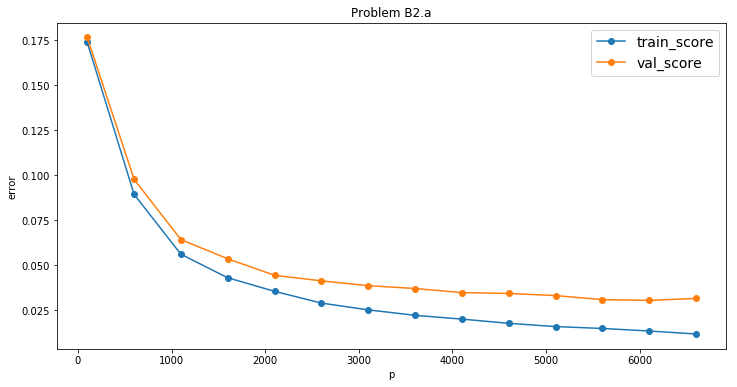